In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json 
import folium
from folium import IFrame
import pandas as pd
import datetime as dt
from glob import glob
from wordcloud import WordCloud, STOPWORDS

# IMPORTING CSV and JSON FILES

In [6]:
#Creating list of filenames
csv_files = glob('/Users/abdoulaziz/Desktop/calday2020/Abdoul_Cal_Day_JN_Youtube/*.csv')
json_files = glob('/Users/abdoulaziz/Desktop/calday2020/Abdoul_Cal_Day_JN_Youtube/*.json')

#Loading files into variables
df_list = list(map(lambda z: pd.read_csv(z,encoding='latin-1',index_col='video_id'),csv_files))
MX_js, IN_js, DE_js,JP_js,KR_js,  CA_js,RU_js,FR_js, US_js,GB_js = list(map(lambda a: json.load(open(a,'r')),json_files))

# ADDING CATEGORIES TO OUR DATASETS

In [7]:
def column_dropper(df):
    new_df = df.drop(columns=['description', 'tags', 'thumbnail_link'])
    return new_df

df_list2 = list(map(column_dropper, df_list)) 

def category_dict_maker(js):
    items = js['items']
    item_id = []
    item_snippet_title = []
    for item in items:
        item_id.append(item['id']) 
        item_snippet_title.append(str(item['snippet']['title']))
    item_dict = dict(zip(item_id, item_snippet_title))
    return(item_dict)

US_dict = category_dict_maker(DE_js)

def category_maker(value):
    for key in US_dict:
        if str(value) == key:
            return (US_dict[key])
        else:
            continue

def cat_applier(df):
    df['category'] = df.category_id.apply(func=category_maker)
    df.category = df.category.astype('category')
    return df.drop(columns=['category_id'])

In [8]:
df_list3 = list(map(cat_applier, df_list2)) 

Youtube_US = df_list3[2]
Youtube_US = Youtube_US.sort_values(by = ['views'],ascending=False)

# GETTING INFORMATION DEPENDING COLUMNS OF INTEREST

In [9]:
def print_top5(column_of_interest,column_stats):
    df = Youtube_US.groupby(column_of_interest)['views', 'likes','comment_count', 'dislikes'].apply(lambda x: x.astype(int).sum())
    return df.sort_values(by=column_stats, ascending=False).head()

In [10]:
print_top5('title','views')

/Users/abdoulaziz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,views,likes,comment_count,dislikes
title,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,368153846,10760732,3462566,5320744
Marvel Studios' Avengers: Infinity War Official Trailer,315890909,11183069,1527230,192545
BTS (ë°©íìë ë¨) 'FAKE LOVE' Official MV,241005611,18025272,3723570,489745
Childish Gambino - This Is America (Official Video),227197666,8711410,922158,385762
To Our Daughter,191009543,0,0,0


# WORDS CLOUD

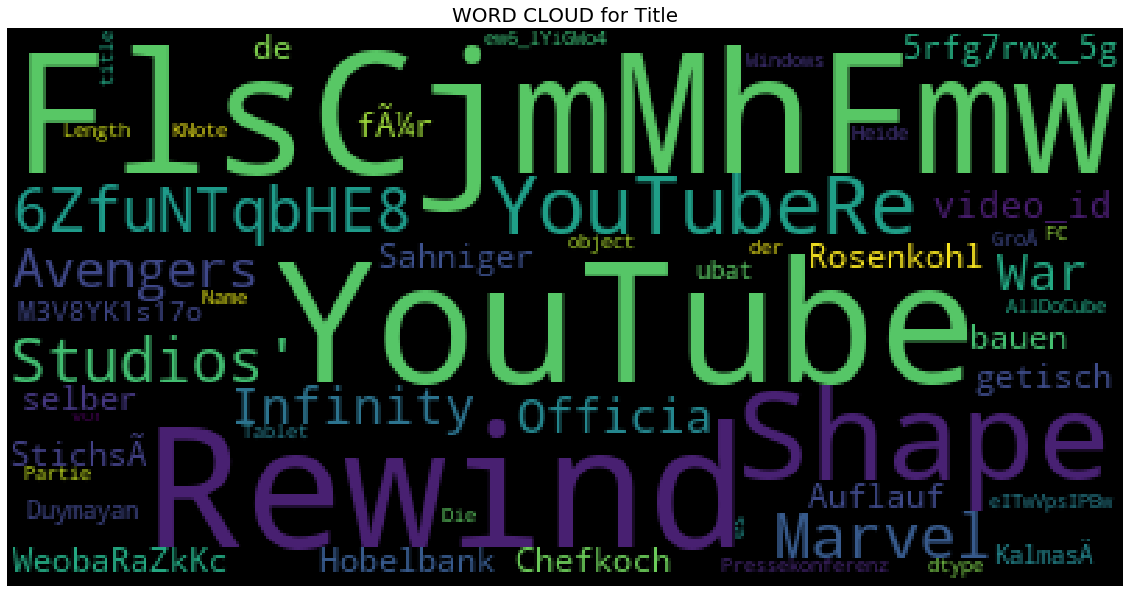

In [11]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'black',stopwords = stopwords,max_words = 1000,max_font_size = 120,random_state = 42).generate(str(Youtube_US['title']))
plt.imshow(wordcloud)
plt.title('WORD CLOUD for Title', fontsize = 20)
plt.axis('off')
plt.show()

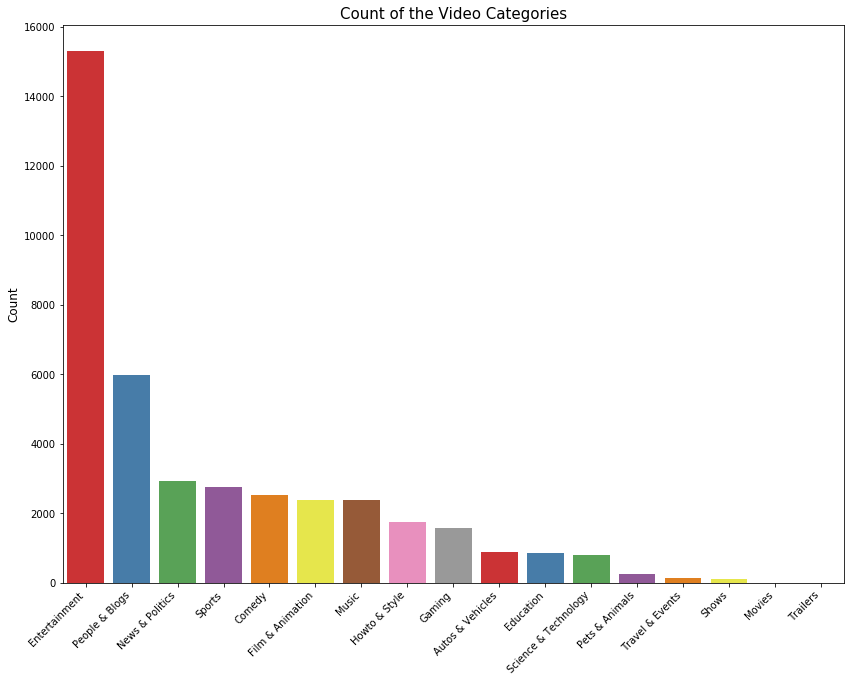

In [12]:
plt.figure(figsize = (14,10))
g = sns.countplot('category', data = Youtube_US, palette="Set1", order = Youtube_US['category'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

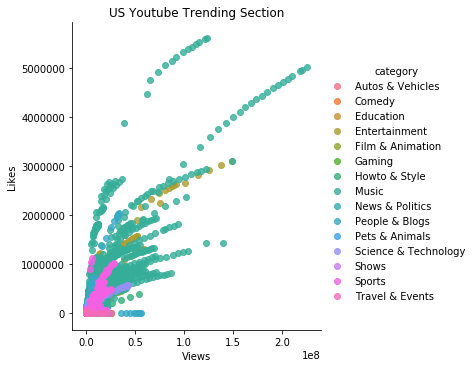

In [13]:
sns.lmplot('views', 'likes', data=df_list3[8], hue='category', fit_reg=False);
plt.title('US Youtube Trending Section')
plt.xlabel('Views');
plt.ylabel('Likes');
plt.show()

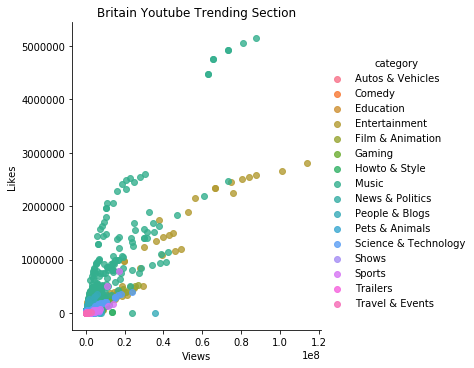

In [14]:
sns.lmplot('views', 'likes', data=df_list3[4], hue='category', fit_reg=False);
plt.title('Britain Youtube Trending Section')
plt.xlabel('Views');
plt.ylabel('Likes');
plt.show()

# MAPPING TO SEE DIFFERENT TREND DEPENDING OF THE COUNTRY OF INTEREST and POP UP of VIDEOS

In [15]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lon':[39.381266, 55.3781, 51.1657, 56.1304, 46.2276, 61.5240, 23.6345, 35.9078,36.2048,20.5937],
   'lat':[-97.922211, -3.4360, 10.4515, -106.3468, 2.2137, 105.3188, -102.5528,127.7669,138.2529,78.9629],
   'name':["USA", "Great Britain", "Germany", "Canada", "France", "Russia", "Mexico", "South Korea", "Japan","India" ],
   'value':[3758488765,8201898179,368153846,631428335,254277636,164942707,254281205,571480244,251185560,577552394]})

# FIRST MAP TRIAL

In [16]:
# Make an empty map
m = folium.Map(location=[12,0], zoom_start=2)
# # I can add marker one by one on the map
for i in range(0,len(data)):
    folium.Circle(location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=float(data.iloc[i]['value']/5000),
      color='crimson',
      fill=True,
      fill_color='grey').add_to(m)
    

for i in range(0,len(data)):
    folium.Marker([data.iloc[i]['lon'], data.iloc[i]['lat']],
                   popup=data.iloc[i]['name'],icon=folium.Icon(color='green', icon='info-sign')
                 ).add_to(m)
m
 
# Save it as html
m.save('mymap.html')

# SECOND MAP (WITH POP-UP VIDEO)

In [17]:
# Make an empty map
m2 = folium.Map(location=[12,0], zoom_start=2)
# # I can add marker one by one on the map

# for i in range(0,len(data)):
#     folium.Circle(location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
#       popup=data.iloc[i]['name'],
#       radius=float(data.iloc[i]['value']/5000),
#       color='crimson',
#       fill=True,
#       fill_color='grey').add_to(m2)
    

htmlIN="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/6ZfuNTqbHE8">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeIN = folium.IFrame(html=htmlIN, width=500, height=300)
popupIN = folium.Popup(iframeIN, max_width=2650)    

htmlRU="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/7C2z4GqqS5E">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeRU = folium.IFrame(html=htmlRU, width=500, height=300)
popupRU = folium.Popup(iframeRU, max_width=2650)  


htmlJP="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/7C2z4GqqS5E">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeJP = folium.IFrame(html=htmlJP, width=500, height=300)
popupJP = folium.Popup(iframeJP, max_width=2650)

htmlFR="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/FlsCjmMhFmw">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeFR = folium.IFrame(html=htmlFR, width=500, height=300)
popupFR = folium.Popup(iframeFR, max_width=2650)

htmlKR="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/7C2z4GqqS5E">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeKR = folium.IFrame(html=htmlKR, width=500, height=300)
popupKR = folium.Popup(iframeKR, max_width=2650)

htmlMX="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/6ZfuNTqbHE8">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeMX = folium.IFrame(html=htmlMX, width=500, height=300)
popupMX = folium.Popup(iframeMX, max_width=2650)

htmlCA="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/FlsCjmMhFmw">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeCA = folium.IFrame(html=htmlCA, width=500, height=300)
popupCA = folium.Popup(iframeCA, max_width=2650)

htmlUS="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/VYOjWnS4cMY">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeUS = folium.IFrame(html=htmlUS, width=500, height=300)
popupUS = folium.Popup(iframeUS, max_width=2650)



htmlDE="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/FlsCjmMhFmw">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeDE = folium.IFrame(html=htmlDE, width=500, height=300)
popupDE = folium.Popup(iframeDE, max_width=2650)

htmlGB="""
    <h1> Click on VIDEO to see the Video</h1><br>
    <a href="https://www.youtube.com/embed/_I_D_8Z4sJE">VIDEO</a>
    <p>
    <code>
        from numpy import *<br>
        exp(-2*pi)
    </code>
    </p>
    """
iframeGB = folium.IFrame(html=htmlGB, width=500, height=300)
popupGB = folium.Popup(iframeGB, max_width=2650)


folium.Marker([data.iloc[0]['lon'], data.iloc[0]['lat']],
                   popup=popupUS
                 ).add_to(m2)

folium.Marker([data.iloc[1]['lon'], data.iloc[1]['lat']],
                   popup=popupGB
                 ).add_to(m2)
folium.Marker([data.iloc[2]['lon'], data.iloc[2]['lat']],
                   popup=popupDE
                 ).add_to(m2)
folium.Marker([data.iloc[3]['lon'], data.iloc[3]['lat']],
                   popup=popupCA
                 ).add_to(m2)
folium.Marker([data.iloc[4]['lon'], data.iloc[4]['lat']],
                   popup=popupFR
                 ).add_to(m2)
folium.Marker([data.iloc[5]['lon'], data.iloc[5]['lat']],
                   popup=popupRU
                 ).add_to(m2)
folium.Marker([data.iloc[6]['lon'], data.iloc[6]['lat']],
                   popup=popupMX
                 ).add_to(m2)
folium.Marker([data.iloc[7]['lon'], data.iloc[7]['lat']],
                   popup=popupKR
                 ).add_to(m2)
folium.Marker([data.iloc[8]['lon'], data.iloc[8]['lat']],
                   popup=popupJP
                 ).add_to(m2)
folium.Marker([data.iloc[9]['lon'], data.iloc[9]['lat']],
                   popup=popupIN
                 ).add_to(m2)

m2
# Save it as html
# m2.save('mymap2.html')
